# Numerična integracija

In [56]:
import numpy as np
from matplotlib import pyplot as plt

## Sestavljeno trapezno pravilo

$\int_a^bf(x)dx = \frac{h}{2}\Bigl[f(a)+2f(a+h)+\dots+2f(b-h)+f(b)\Bigr]$

In [81]:
def trapez(a, b, n):
    x = np.linspace(a, b, n+1)
    h = x[1] - x[0]
    w = np.ones(n+1)*h
    w[0] /= 2
    w[-1] /= 2
    return x, w

In [86]:
def numeric_integral(f, x, w):
    #print(f(x), w)
    integral = f(x)@w
    return integral

Izračunajmo integral $\int_{-1}^{1}x^2dx = \frac{2}{3}$ z uporabo sestavljenega trapeznega pravila.

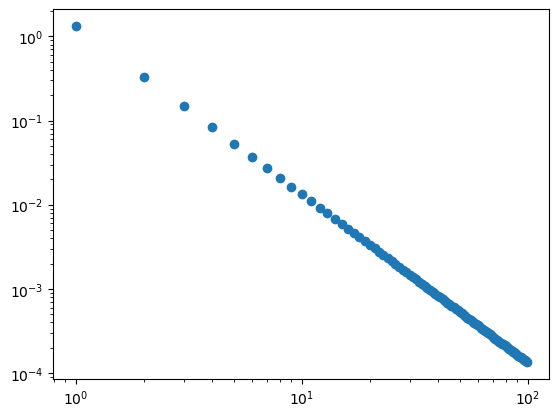

In [126]:
f = lambda x: x**2
err = lambda n: abs(1**3*2/3-numeric_integral(f, *trapez(-1, 1, n)))
errs = [err(i) for i in range(1,100)]
plt.scatter(np.arange(1, len(errs)+1), errs)
plt.yscale('log')
plt.xscale('log')
plt.show()

## Sestavljeno Simpsonovo pravilo

$\int_a^bf(x)dx = \frac{h}{3}\Bigl[f(a) + 4f(a+\frac{h}{2}) + 2f(a+h) + \dots + 2f(b-h) + 4f(b-\frac{h}{2}) + f(b)\Bigr]$

In [104]:
def simpson(a,b,n):
    x = np.linspace(a,b, 2*n+1)
    h = x[1] - x[0]
    w = np.ones(2*n+1)
    w[1:-1:2] = 4
    w[2:-2:2] = 2
    w *= h/3
    return x, w
    

Izračunajmo integral $\int_{-1}^{1}x^2dx = \frac{2}{3}$ z uporabo sestavljenega Simpsonovega pravila.

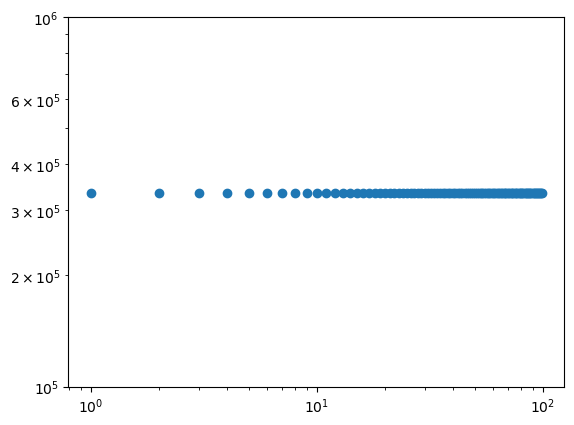

In [131]:
f = lambda x: x**2#-np.exp(-x)#+x**2
err = lambda n: abs(100*2/3 - numeric_integral(f, *simpson(0, 100, n)))
errs = [err(i) for i in range(1,100)]
#display(errs)
plt.scatter(np.arange(1, len(errs)+1), errs)
plt.yscale('log')
plt.xscale('log')
plt.show()

## Gauss–Legendre kvadrature